In [1]:
import numpy as np
import matplotlib.pyplot as plt

## K Means

In [2]:
class Kmeans():
    
    def __init__(self, num_clusters, num_iter):
        self.num_clusters = num_clusters
        self.num_iter = num_iter

    def initialize_centers(self, x):
        idx = np.random.choice(len(x), self.num_clusters, replace=False)
        centers = x[idx,:]
        return centers
    
    def compute_distances(self, x, centers):
        distance_all=[]
        for k in range(self.num_clusters):
            distance = []
            for i in range(len(x)):
                distance.append(np.sqrt(np.linalg.norm(x[i,:] - centers[k,:])))
            distance_all.append(np.array(distance)) 
        return np.array(distance_all)
    
    def compute_centroids(self, x, labels):
        centers = np.zeros((self.num_clusters, x.shape[1]))
        for k in range(self.num_clusters):
            centers[k,:] = np.mean(x[labels==k, :], axis=0) 
        
        return centers
        
    def find_closest_center(self, distances):
        closest_center = np.argmin(distances, 0)
        return closest_center
    
    def compute_error(self, x, labels, centers):
        distances = np.zeros(x.shape[0])
        for k in range(self.num_clusters):
            distances[labels==k] = np.linalg.norm(x[labels == k] - centers[k], axis=1)
        return np.sum(np.square(distances))
    
    def fit(self, x):
        self.centers = self.initialize_centers(x)
        
        for i in range(self.num_iter):
            current_centers = self.centers;
            
            distance = self.compute_distances(x, current_centers)
            labels = self.find_closest_center(distance)
            self.centers = self.compute_centroids(x, labels)
            
            current_error = self.compute_error(x, labels, current_centers)
            new_error = self.compute_error(x, labels, self.centers)
            
                   
            if np.mod(i,50) == 0:
                print(current_error, new_error)
            if (current_error - new_error) < .000001:
                print("Error minimized. training complete!", current_error)
                return self.centers

    def predict(self, x):
        distance = self.compute_distances(x, self.centers)
        labels = self.find_closest_center(distance)
        return labels
            

88.88428658985205 66.3403182079755
Error minimized. training complete! 35.229787442104204


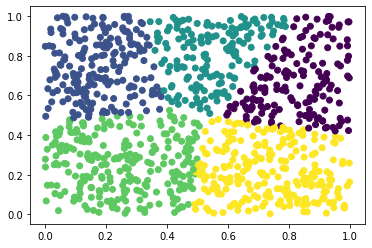

In [3]:
x = np.random.rand(1000,2)
kmean = Kmeans(5, 300)
kmean.fit(x)
labels = kmean.predict(x)
plt.scatter(x=x[:,0],y=x[:,1],c=labels)

In [ ]:
knn = KNN()
knn.fit(X, Y)

rand_index = np.random.choice(X.shape[0],10)
x_test = X[300,:]
x_test = [0.5, 0.8]
y_pred = knn.predict(x_test)
print(f'x test = {x_test}')
print(f'y predicted = {y_pred}')

fig = plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(x_test[0],x_test[1], c="red")

for i in range(knn.num_clusters):
    plt.text(knn.centroids[i,0], knn.centroids[i,1], str(knn.labels[i]), fontdict=dict(color='red', alpha=1, size=20))



47.536786002131215 36.67371988739711
Error minimized. training complete! 30.157963368588966


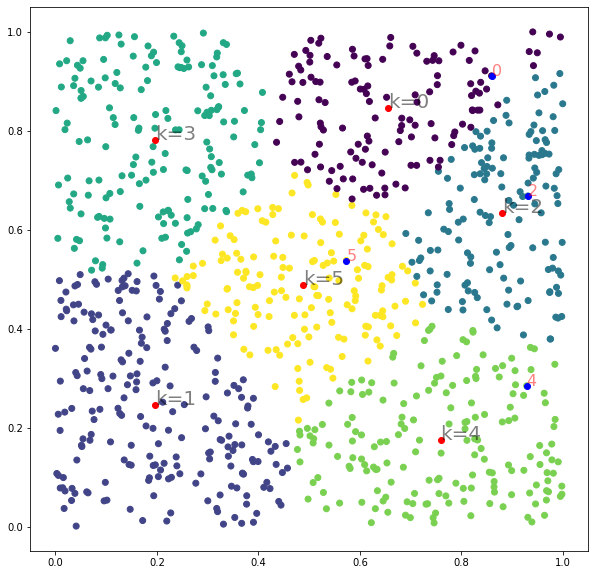

In [4]:
x = np.random.rand(1000,2)
kmean = Kmeans(6, 300)
kmean.fit(x)
labels = kmean.predict(x)

fig = plt.figure(figsize=(10,10))
plt.scatter(x=x[:,0],y=x[:,1],c=labels)
plt.scatter(x=kmean.centers[:,0],y=kmean.centers[:,1],c=['red'])

num_str_list = ["k="+str(i) for i in range(kmean.num_clusters)]
# txt = dict(zip(num_str_list, list(range(kmean.num_clusters))))
for i in range(kmean.num_clusters):
    plt.text(kmean.centers[i,0], kmean.centers[i,1], num_str_list[i], fontdict=dict(color='black', alpha=0.5, size=20))

## Draw a test case.
x_test = x[1:5,:]
label = kmean.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1], c='blue')
for i in range(len(label)):
    plt.text(x_test[i,0],x_test[i,1], str(label[i]), fontdict=dict(color='red', alpha=0.5, size=16))
